In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv('clean_food_data.csv')

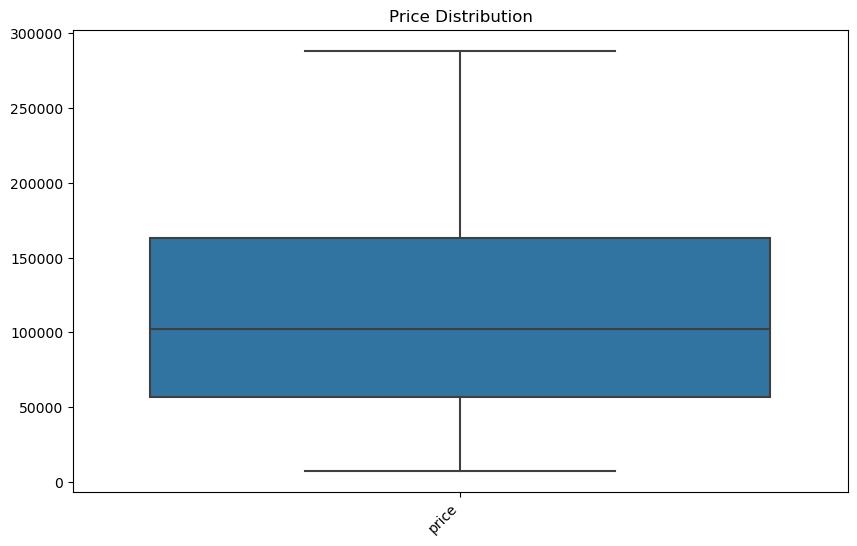

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data[['price']])
plt.title("Price Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

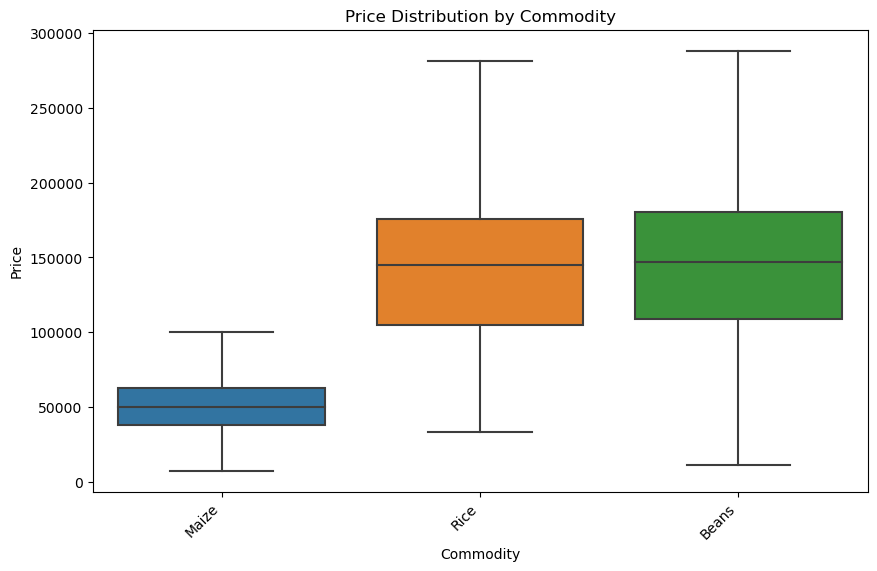

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="commodity", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Commodity")
plt.ylabel("Price")
plt.show()

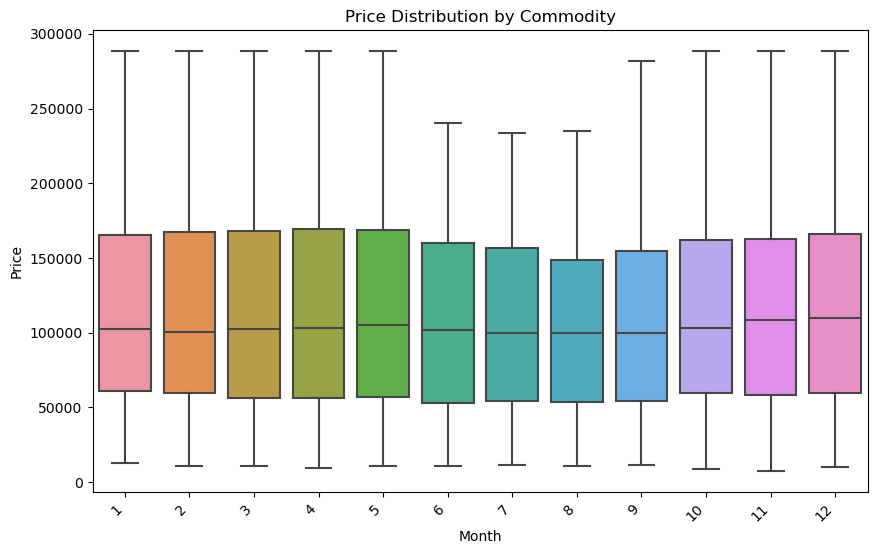

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="month", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

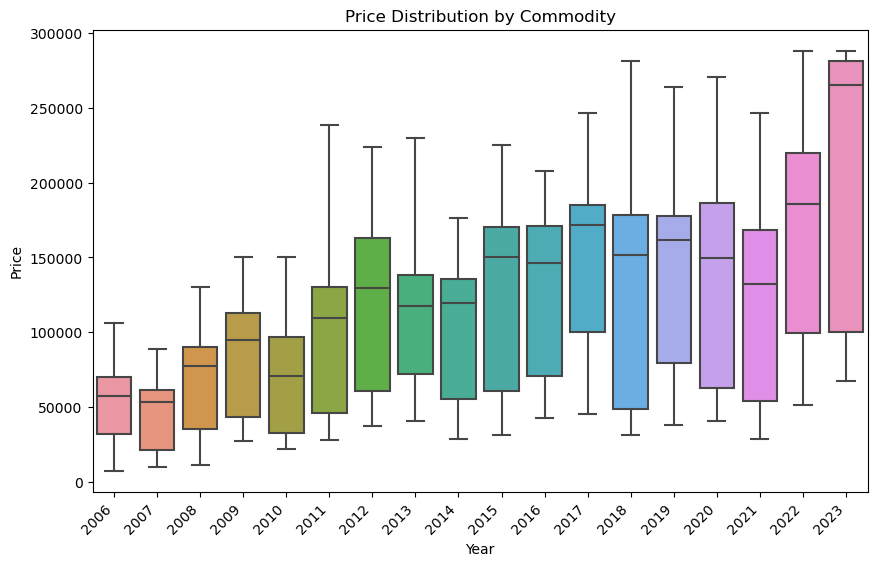

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="year", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [53]:
def handle_outliers(data, column):
    Q3 = data[column].quantile(.75)
    Q1 = data[column].quantile(.25)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

In [54]:
beans_data = data[data['commodity'] == 'Beans']
lower, upper = handle_outliers(beans_data, 'price')
data.loc[((data['commodity'] == 'Beans') & (data['price'] < lower)), 'price'] = lower
data.loc[((data['commodity'] == 'Beans') & (data['price'] > upper)), 'price'] = upper

In [56]:
maize_data = data[data['commodity'] == 'Maize']
beans_data  = data[data['commodity'] == 'Beans']
rice_data  = data[data['commodity'] == 'Rice']

In [57]:
maize_data = pd.get_dummies(maize_data, prefix_sep='_', columns=['market'], dtype=int)
beans_data = pd.get_dummies(beans_data, prefix_sep='_', columns=['market'], dtype=int)
rice_data = pd.get_dummies(rice_data, prefix_sep='_', columns=['market'], dtype=int)

In [58]:
def remove_feature(df):
    column = ['latitude', 'longitude', 'unit', 'commodity']

    columns = list(df.columns)
    for col in column:
        columns.remove(col)
    
    df = df[columns]

    return df

In [59]:
maize_data = remove_feature(maize_data)
beans_data =remove_feature(beans_data)
rice_data = remove_feature(rice_data)

In [60]:
def plot_heatmap(df, name):
    plt.figure(figsize=(12, 8)) 
    correlation = df.corrwith(df['price'])
    sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap of with " + name + " Price")
    plt.show()

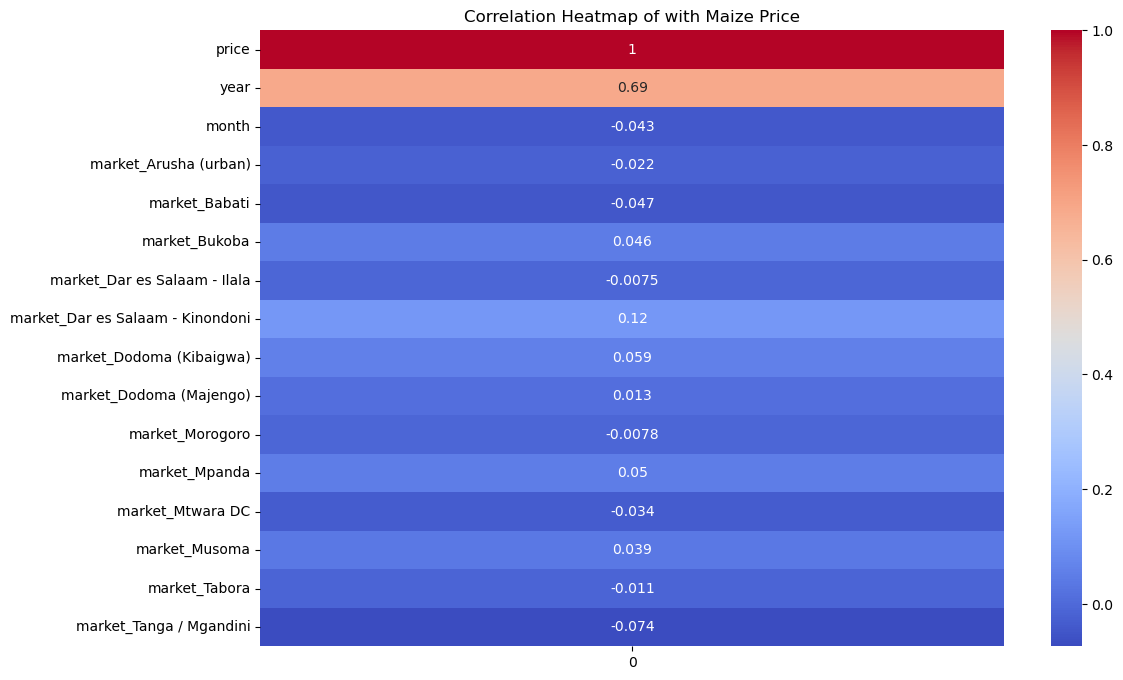

In [61]:
plot_heatmap(maize_data, 'Maize')

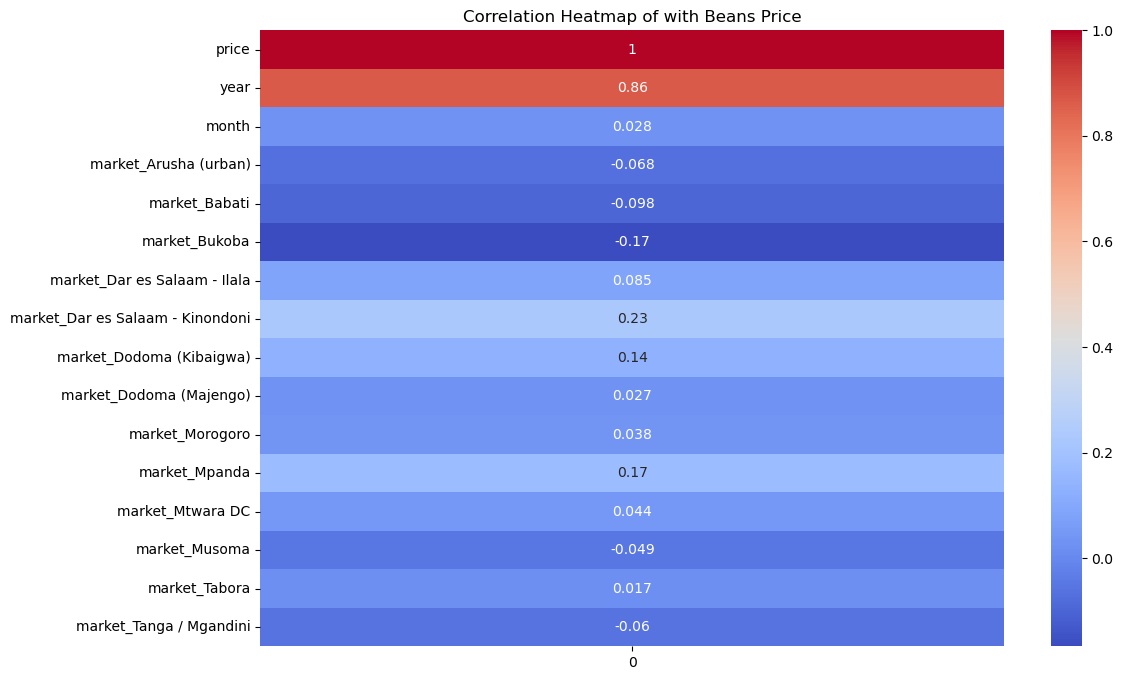

In [62]:
plot_heatmap(beans_data, 'Beans')

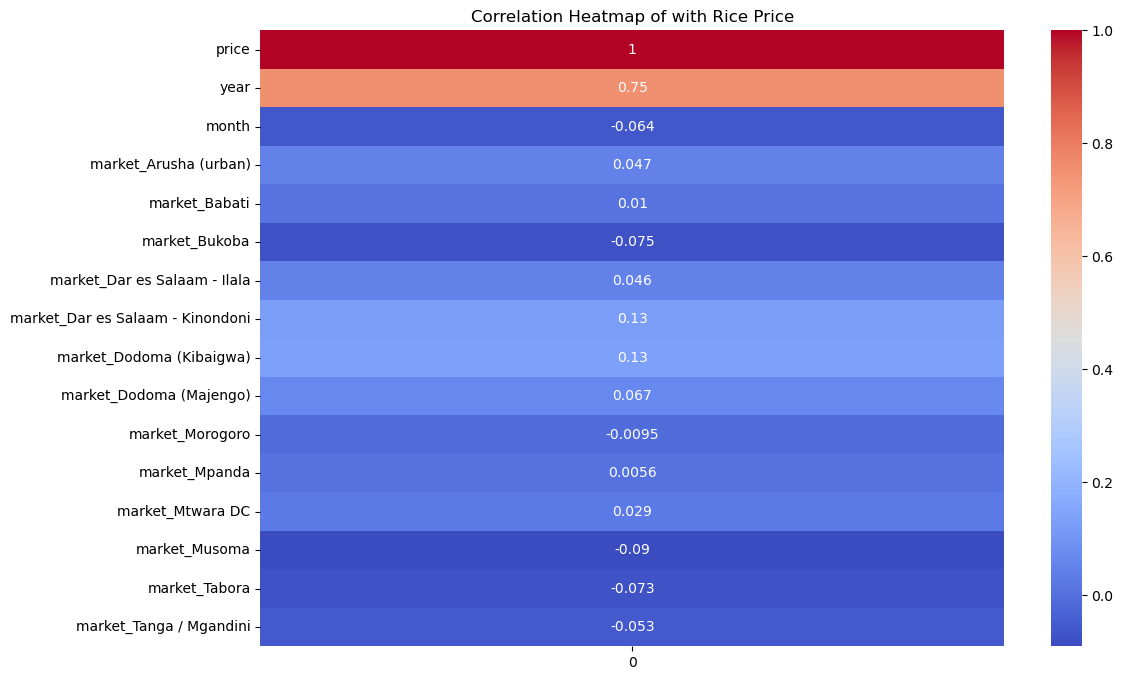

In [63]:
plot_heatmap(rice_data, 'Rice')

In [65]:
maize_data.to_csv('maize.csv', index=False)
beans_data.to_csv('beans.csv', index=False)
rice_data.to_csv('rice.csv', index=False)